In [5]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [52]:
df = pd.read_csv("api_docs/data.csv")
labels=np.array(['amphibians', 'birds', 'cacti', 'conifers', 'mammals', 'turtles'])

In [53]:
example_data = df.loc[5].values[1:]
example_data

array([ 41.25612494,  81.34012494,  38.91925294,  60.39573215,
        70.41857677,  64.52118305])

In [54]:
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
angles

array([ 0.        ,  1.04719755,  2.0943951 ,  3.14159265,  4.1887902 ,
        5.23598776,  0.        ])

In [55]:
example_data = np.concatenate((example_data, [example_data[0]]))

In [56]:
example_data

array([ 41.25612494,  81.34012494,  38.91925294,  60.39573215,
        70.41857677,  64.52118305,  41.25612494])

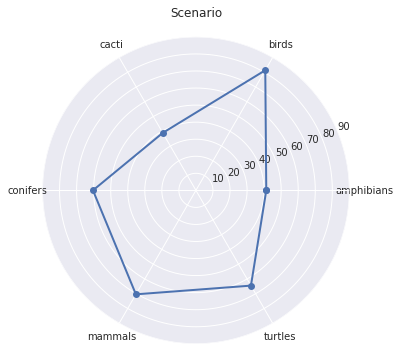

In [62]:
fig=sns.plt.figure()
ax = fig.add_subplot(111, polar=True)   # Set polar axis
ax.plot(angles, example_data, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
ax.set_title("Scenario")
ax.grid(True)

[ 41.25612494  90.0075374   38.91925294  60.39573215  78.91151091
  64.52118305  41.25612494]


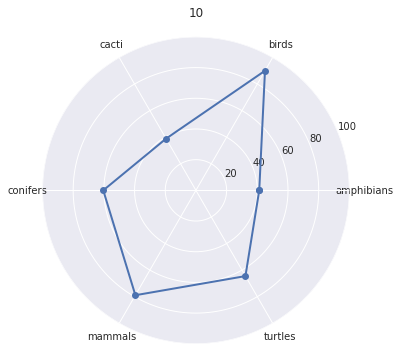

In [75]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def plot_scenario(scenario, data):
    current_plot = data.loc[int(scenario)].values[1:]
    current_plot = np.concatenate((current_plot, [current_plot[0]]))
    print(current_plot)
    fig=sns.plt.figure()
    ax = fig.add_subplot(111, polar=True)   # Set polar axis
    ax.plot(angles, current_plot, 'o-', linewidth=2)  # Draw the plot (or the frame on the radar chart)
    ax.set_thetagrids(angles * 180/np.pi, labels)  # Set the label for each axis
    ax.set_title(str(scenario))
    ax.grid(True)


    
plot_scenario(10, df)

[ 92.84520871  98.17656377  38.91925294  60.39573215  97.03766207
  64.52118305  92.84520871]


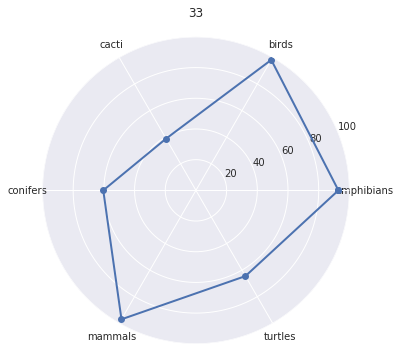

In [77]:
@interact(scenario = (0, 50))
def g(scenario):
    return plot_scenario(scenario, df)